<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/blob/main/Chapter13/Detectron2_Chapter13_D2Go_Existing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

detectron2

In [ ]:
!python -m pip -qq install 'git+https://github.com/facebookresearch/detectron2.git'

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 10.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


mobile-vision

In [ ]:
!python -m pip -qq install 'git+https://github.com/facebookresearch/mobile-vision.git'

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 4.4 MB/s eta 0:00:00


d2go

In [ ]:
!python -m pip -qq install "git+https://github.com/facebookresearch/d2go.git"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 20.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.2 which is incompatible.


# D2Go quick fixes

### configs folder

In [ ]:
!pip list -v | grep d2go

d2go                          0.0.1b20230219         /usr/local/lib/python3.8/dist-packages pip


In [ ]:
!ls /usr/local/lib/python3.8/dist-packages/d2go

checkpoint	evaluation	modeling     quantization  tests
config		export		model_zoo    registry	   tools
data		initializer.py	optimizer    runner	   trainer
distributed.py	__init__.py	__pycache__  setup.py	   utils


In [ ]:
!git clone https://github.com/facebookresearch/d2go.git d2go_repo

Cloning into 'd2go_repo'...
remote: Enumerating objects: 4343, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 4343 (delta 117), reused 187 (delta 106), pack-reused 4138
Receiving objects: 100% (4343/4343), 2.95 MiB | 9.11 MiB/s, done.
Resolving deltas: 100% (3047/3047), done.


In [ ]:
d2go_dir = "/usr/local/lib/python3.8/dist-packages/d2go" 
configs_dir = f"{d2go_dir}/configs"
import os
os.makedirs(configs_dir, exist_ok=True)

In [ ]:
!cp -r d2go_repo/configs {d2go_dir}

In [ ]:
!ls "/usr/local/lib/python3.8/dist-packages/d2go/configs" 

faster_rcnn_fbnetv3a_C4_FSDP.yaml    keypoint_rcnn_fbnetv3a_dsmask_C4.yaml
faster_rcnn_fbnetv3a_C4_LSJ.yaml     mask_rcnn_fbnetv3a_C4.yaml
faster_rcnn_fbnetv3a_C4.yaml	     mask_rcnn_fbnetv3a_dsmask_C4.yaml
faster_rcnn_fbnetv3a_dsmask_C4.yaml  mask_rcnn_fbnetv3g_fpn.yaml
faster_rcnn_fbnetv3g_fpn.yaml	     qat_faster_rcnn_fbnetv3a_C4.yaml


### D2Go Model Zoo

- Step 1: Click on this link (or locate it using this directory)
/usr/local/lib/python3.8/dist-packages/d2go/trainer/fsdp.py
- Step 2: Remove line (16): change `from torch.ao.pruning import fqn_to_module` to `from torch.ao.sparsity.sparsifier.utils import fqn_to_module`
- Step 3: Save the change

## Get a model

In [ ]:
from d2go.model_zoo import model_zoo
selected_model = 'faster_rcnn_fbnetv3a_C4.yaml'
model = model_zoo.get(selected_model, trained=True)

model_final.pth: 74.3MB [00:05, 14.8MB/s]                            
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pwl.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_hea

## Input

In [ ]:
!wget -qq https://github.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/raw/main/datasets/800x800image/input.jpeg


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def imshow(image):
  dpi = plt.rcParams["figure.dpi"]
  im_data = image[:,:, ::-1]
  height, width, depth = im_data.shape
  figsize = width / float(dpi), height / float(dpi)
  fig = plt.figure(figsize=figsize)
  plt.imshow(im_data)
  plt.imshow(im_data)
  plt.axis("off")
  plt.show()


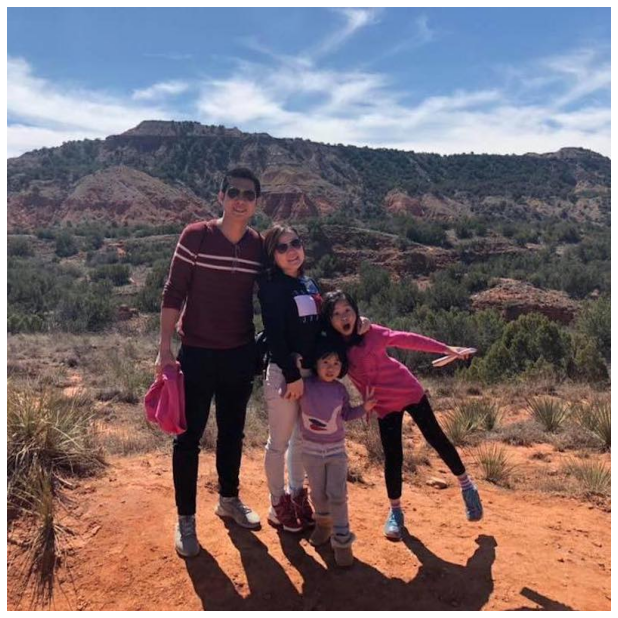

In [ ]:
import cv2
img = cv2.imread("./input.jpeg")
imshow(img)

## DemoPredictor

In [ ]:
from d2go.utils.demo_predictor import DemoPredictor
predictor = DemoPredictor(model)
outputs = predictor(img)
pred_instances = outputs["instances"]
print(pred_instances)

Instances(num_instances=10, image_height=800, image_width=800, fields=[pred_boxes: Boxes(tensor([[187.2431, 211.5772, 384.4924, 711.0326],
        [347.6918, 385.5148, 480.2947, 747.8323],
        [375.6132, 371.9870, 620.2853, 725.2900],
        [348.4673, 643.8885, 452.5689, 765.8668],
        [455.8702, 422.2232, 640.2230, 685.9368],
        [319.8739, 275.5755, 417.1956, 651.1306],
        [224.1623, 656.9628, 340.6416, 790.6293],
        [496.0885, 670.5968, 641.2301, 750.6605],
        [345.4467, 654.7966, 552.8320, 770.0833],
        [499.2968, 669.8000, 639.1102, 750.0955]])), scores: tensor([0.9974, 0.9540, 0.9063, 0.6769, 0.4782, 0.3086, 0.2689, 0.1755, 0.0990,
        0.0933]), pred_classes: tensor([ 0,  0,  0, 30, 33,  0, 30, 30, 30, 31])])


/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
thresh_test = 0.5
selected_idxs = pred_instances.scores > thresh_test
pred_instances = pred_instances[selected_idxs]
pred_instances

Instances(num_instances=4, image_height=800, image_width=800, fields=[pred_boxes: Boxes(tensor([[187.2431, 211.5772, 384.4924, 711.0326],
        [347.6918, 385.5148, 480.2947, 747.8323],
        [375.6132, 371.9870, 620.2853, 725.2900],
        [348.4673, 643.8885, 452.5689, 765.8668]])), scores: tensor([0.9974, 0.9540, 0.9063, 0.6769]), pred_classes: tensor([ 0,  0,  0, 30])])

## Visualization

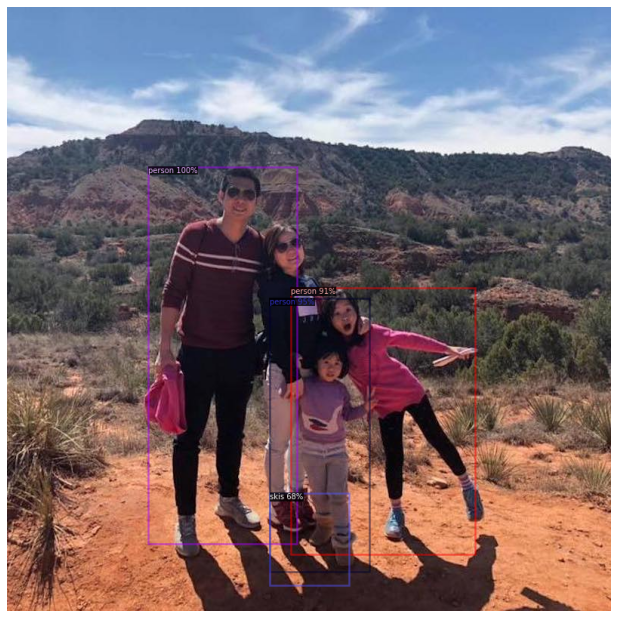

In [ ]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
metadata = MetadataCatalog.get("coco_2017_train")
v = Visualizer(img[:, :, ::-1], metadata)
instances = pred_instances.to("cpu")
annotated_img = v.draw_instance_predictions(instances)
imshow(annotated_img.get_image()[:,:,::-1])